# Normal climatológica de precipitação e temperatura 
Estação 1006 - Florianópolis - Cetre/Epagri <br> 
Período analisado: Jan/2002 a Dez/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dados de entrada
pasta = "C:\\ENS\\LAUTEC\\Inputs\\Normal_climatologica"
precipitacao = pd.read_excel(pasta+'\\precipitacao_diaria_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
#temperatura = 

In [3]:
# Somatório 
precipitacao = precipitacao.resample('ME').sum()

# Extrair dados de Jan/2002 a Dez/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2002-01-01')&(
    precipitacao.index <= '2024-12-31')]

# Coluna com o mês
precipitacao['Mês'] = precipitacao.index.month 

In [4]:
# Excluir meses em que a soma foi zero (problemas de medição) 
precipitacao = precipitacao.loc[~(precipitacao['Soma Diária'] == 0)]
precipitacao.head() 

,Soma Diária,Registros,Falhas,Mês
Data,,,,
2002-01-31,167.29,741,3,1
2002-02-28,215.55,672,0,2
2002-03-31,80.72,739,5,3
2002-04-30,194.48,720,0,4
2002-05-31,59.87,742,2,5


In [5]:
# Extrair valores mínimos, médios e máximos
prec_min = precipitacao.groupby('Mês').min()
prec_med = precipitacao.groupby('Mês').mean() 
prec_max = precipitacao.groupby('Mês').max()

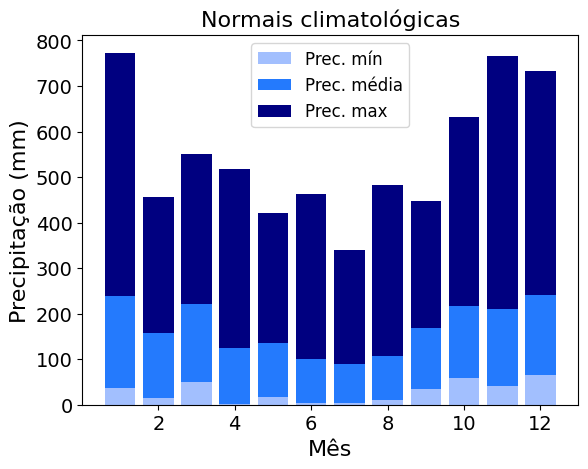

In [10]:
# Gráfico 
fig, ax = plt.subplots() 

ax.bar(prec_min.index, prec_min['Soma Diária'],
       color='xkcd:pastel blue',
       label='Prec. mín')
ax.bar(prec_med.index, prec_med['Soma Diária'], 
       color='xkcd:clear blue',
       bottom=prec_min['Soma Diária'],
       label='Prec. média')
ax.bar(prec_max.index, prec_max['Soma Diária'], 
       color='navy', 
       bottom=prec_min['Soma Diária']+prec_med['Soma Diária'],
       label='Prec. max')

ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Precipitação (mm)', fontsize=16)
plt.title('Normais climatológicas', fontsize=16) 
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.legend(fontsize=12)

In [7]:
prec_min

,Soma Diária,Registros,Falhas
Mês,,,
1,35.80,465,0
2,15.20,120,0
3,49.48,600,0
4,1.40,600,0
5,16.80,168,0
6,4.29,536,0
7,4.55,288,0
8,9.37,712,0
9,35.51,576,0


In [8]:
prec_med

,Soma Diária,Registros,Falhas
Mês,,,
1,203.334091,726.636364,3.181818
2,142.130000,601.727273,2.636364
3,171.842273,732.727273,1.454545
4,122.780455,711.545455,1.909091
5,117.822273,700.045455,3.590909
6,96.181364,704.454545,3.545455
7,85.102609,711.260870,2.478261
8,96.973043,740.086957,3.913043
9,132.606522,710.695652,3.043478


In [9]:
prec_max

,Soma Diária,Registros,Falhas
Mês,,,
1,534.00,744,16
2,298.62,696,32
3,328.60,744,19
4,393.00,720,22
5,287.14,744,50
6,361.60,720,42
7,249.60,744,36
8,375.85,744,32
9,280.37,720,30
